# Common Conversion Point Stack of a Single Station

The following notebook carries you through how to get from 
a set of receiver functions of a single station to a 3D 
common conversion point (CCP) stack using the data from the
`YP` network, which you should have downloaded in a previous step. 

---
***Note***:

It is assumed here that you have successfully computed the
receiver functions from the `00b_DataCollection_hdf.ipynb`.


## Compute Common Conversion Point Stack

This is similar to the single station stacks.


In [25]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
from pyglimer.ccp import init_ccp
import os
import numpy as np

# Define the location of the database
databaselocation = "database"
inter_bin_distance = 0.3
velocity_model = '3D'

ccp_init_dict = {
    "spacing": inter_bin_distance,
    "vel_model": velocity_model,
    "binrad": 1,
    "phase": 'S',
    "preproloc": None,  # needs to be None if hdf5
    "rfloc": os.path.join(databaselocation, "waveforms", "RF"),
    "network": "YP",
    "compute_stack": True,
    "save": 'ccp_YP_S.pkl',
    'format': 'hdf5',
    'mc_backend': 'joblib'  # Backend to be used for multicore processing
    # Note that for MPI to work properly it needs to be called via bash
}

# Initialize bins
ccpstack = init_ccp(**ccp_init_dict)


100%|██████████| 242/242 [02:06<00:00,  1.92it/s]


In [27]:
print(ccpstack)

Teleseismic Phase: 		S
Bin distance: 			0.3
Bin radius: 			0.6
Bounding Box: 	Latitude: 	30.0                    59.7
		Longitude: 	98.9                     151.5
Number of Receiver Functions: 	1286


Finalizing the CCPStack

In [28]:
ccpstack.conclude_ccp(keep_water=True)

### Plot bins

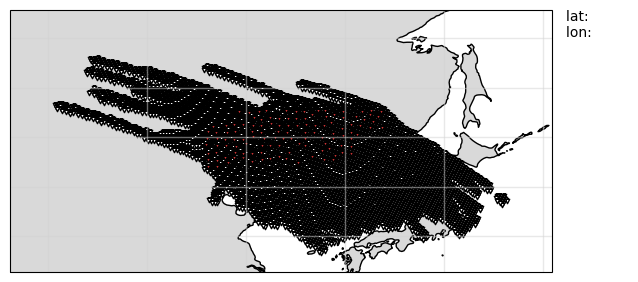

In [12]:
# Plot bins
# %matplotlib widget
import matplotlib.pyplot as plt
plt.ion()
ccpstack.plot_bins()

### Read stack from file and interpolate volume

In [22]:
import numpy as np
from pyglimer.ccp.ccp import read_ccp

ccpstack = read_ccp(filename='ccp_YP_S.pkl', fmt=None)

lats = np.arange(41, 49, 0.05)
lons = np.arange(115, 135, 0.05)
z = np.linspace(-10, 200, 211)


### Use the `CCPStack` object to image the subsurface

Given a `CCPStack` object there are multiple ways to get images of the subsurface.

#### Compute Volume and slice using 2D images

#### Compute Slices through the Stack using cross sections

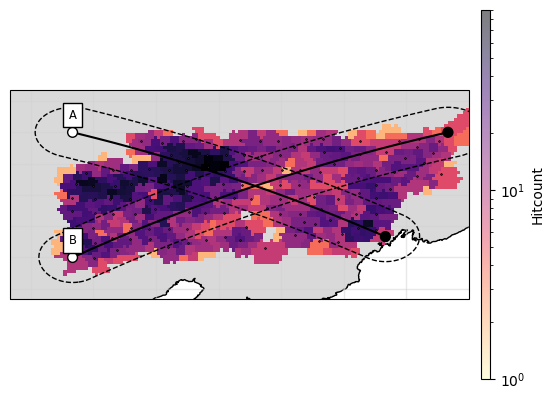

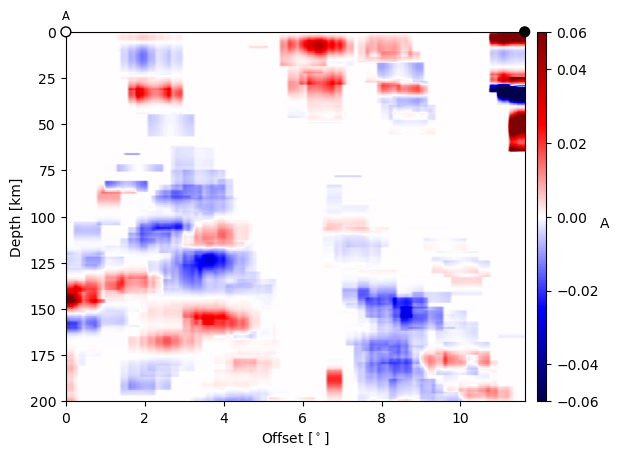

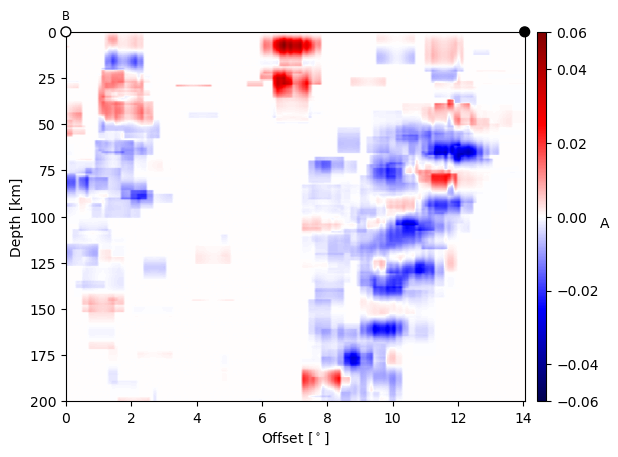

In [29]:
# Create points waypoints for the cross section
lat0 = np.array([48, 43])
lon0 = np.array([116, 131])
lat1 = np.array([42, 48])
lon1 = np.array([116, 134])

# Set RF boundaries
mapextent = [113, 135, 40, 50]
depthextent = [0, 200]
vmin = -0.05
vmax = 0.05
 
# Plot cross sections
ax1, geoax = ccpstack.plot_cross_section(
    lat0, lon0, 0.1, z0=23, vmin=vmin, vmax=vmax,
    mapplot=True, minillum=1, label="A", 
    depthextent=depthextent,
    mapextent=mapextent)
ax2, _ = ccpstack.plot_cross_section(
    lat1, lon1, 0.1, vmin=vmin, vmax=vmax,
    geoax=geoax, mapplot=True,  
    minillum=1, label="B",
    depthextent=depthextent
)